# k-fold-predictions confusion matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

df = pd.read_csv("k-fold-predictions.csv", sep=';', keep_default_na=False)
df

,fold,match,utterance,expectedIntent,predictedIntent
0,1,N,Bisogna spegnere il fuoco!,fuoco-libero,
1,1,N,Sono una cuoca provetta,cucinare,
2,1,N,Ho il bicchiere vuoto,manca-acqua-tavola,
3,1,N,Staranno facendo dei lavori?,no-acqua in casa,
4,1,N,Mi prendo qualcosa da bere,sete,None
...,...,...,...,...,...
1623,5,N,Forse dovrei bagnare le piante,piante,None
1624,5,Y,Hanno chiuso l'acqua?,no-acqua in casa,no-acqua in casa
1625,5,N,Se non stacco impazzisco,svago-relax,None
1626,5,N,Aprite le finestre che c'è un insetto,insetto,None


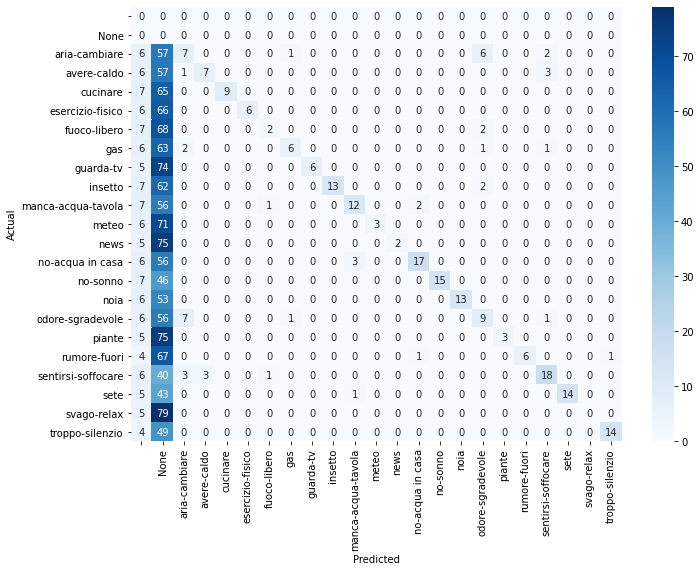

In [2]:
y_true = df["expectedIntent"]
y_pred = df["predictedIntent"]

labels = np.unique(np.concatenate((y_true, y_pred)))

cm = confusion_matrix(y_true, y_pred, labels=labels)

df_cm = pd.DataFrame(cm, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,8))
# sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 10})# font size

## Normalized confusion matrix

In [3]:
norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

<ipython-input-3-7f808820dc1c>:1: RuntimeWarning: invalid value encountered in true_divide
  norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


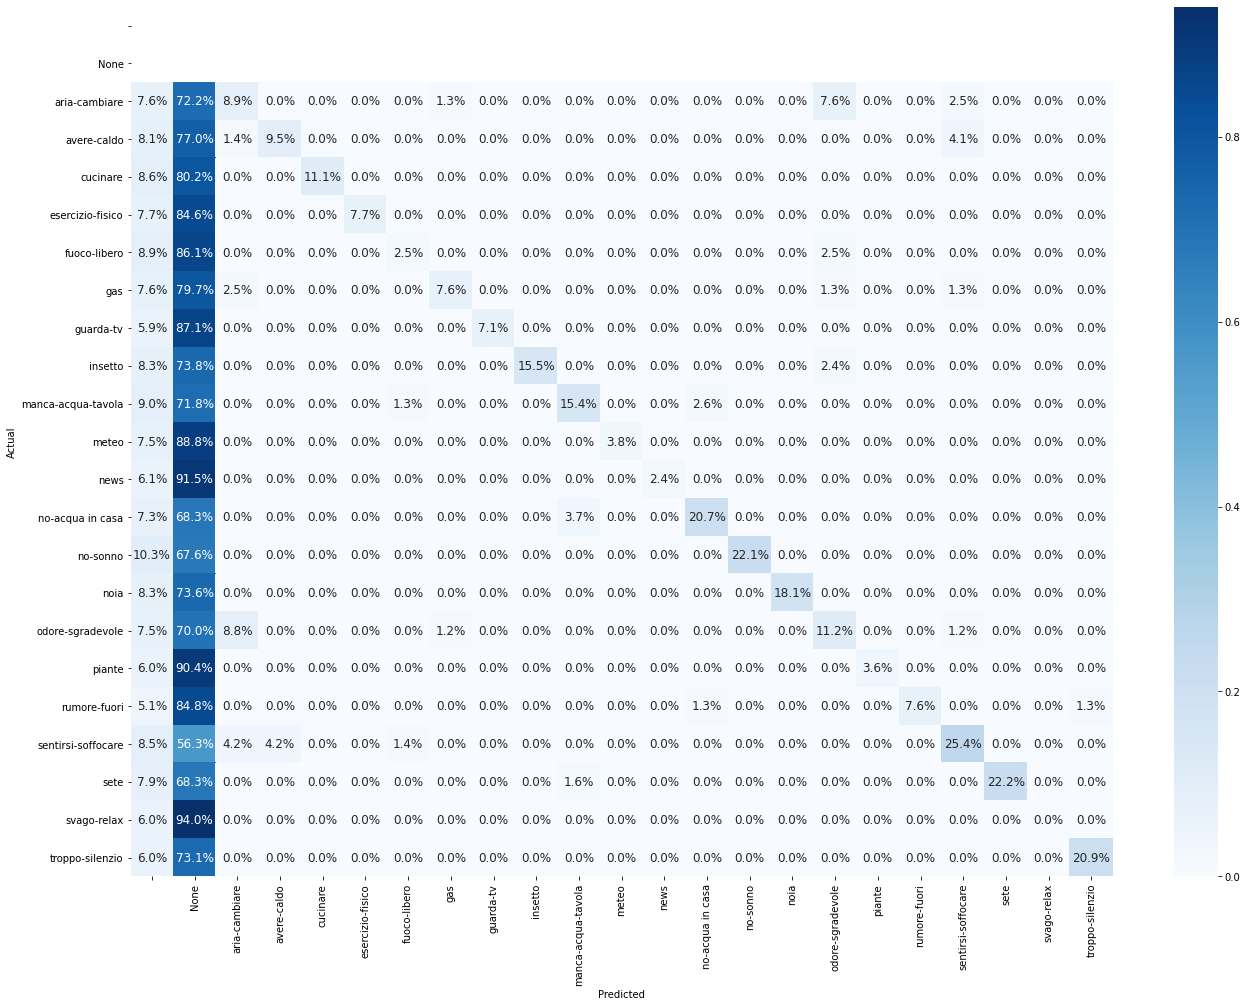

In [4]:
df_norm_cm = pd.DataFrame(norm_cm, columns=labels, index = labels)
df_norm_cm.index.name = 'Actual'
df_norm_cm.columns.name = 'Predicted'
plt.figure(figsize = (22,16))
sn.heatmap(df_norm_cm, cmap="Blues", annot=True,annot_kws={"size": 12},fmt='.1%')# font size